In [21]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [22]:
output_dir = "merge_single_double_filling"

os.makedirs(output_dir, exist_ok=True)

In [23]:
t = 10000
ne = 1000
n = 50

In [25]:
filename = os.path.join(output_dir, 'single_left.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D1 = arr['D']
    single_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0]], numpy.array([1.0], dtype=numpy.complex128), n, 1, num_experiments=ne)
    D1 = s.get_enumerated_states().shape[0]
    single_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=single_purities, D=D1)

In [26]:
filename = os.path.join(output_dir, 'double_left.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D2 = arr['D']
    left_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    D2 = s.get_enumerated_states().shape[0]
    left_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=left_purities, D=D2)

In [27]:
filename = os.path.join(output_dir, 'double_sep.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D2 = arr['D']
    sep_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    D2 = s.get_enumerated_states().shape[0]
    sep_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=sep_purities,D=D2)

In [28]:
filename = os.path.join(output_dir, f'triple_scaling_{n}.npz')
if os.path.exists(filename):
    arr = numpy.load(filename)
    D1 = arr['D']
    three_left_purities = arr['data']
else:
    s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), n, 3, num_experiments=ne)
    D3 = s.get_enumerated_states().shape[0]
    three_left_purities = s.apply_alternative_layers_and_save_mean_purity(t)
    numpy.savez(filename, data=three_left_purities,D=D3)

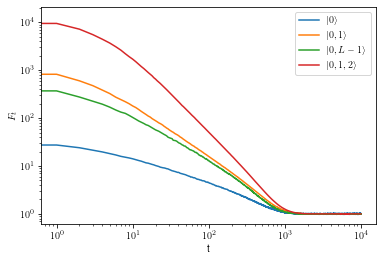

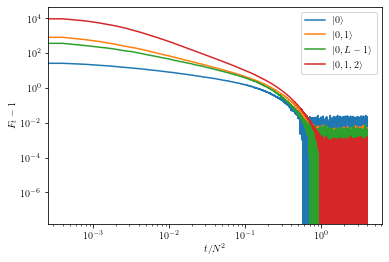

In [29]:
purities = [single_purities, left_purities, sep_purities, three_left_purities]
labels = [r'$\vert 0 \rangle$', r'$\vert 0, 1 \rangle$', r'$\vert 0, L-1 \rangle$', r'$\vert 0,1,2 \rangle$']

for label, purity in zip(labels, purities):
    pyplot.plot(purity, label=label)
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# for label, purity in zip(labels, purities):
#     pyplot.plot(purity, label=label)
    
# pyplot.xlabel('t')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# pyplot.legend()
# pyplot.show()

for label, purity in zip(labels, purities):
    pyplot.plot(numpy.arange(len(purity))/n**2, purity - 1.0, label=label)
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

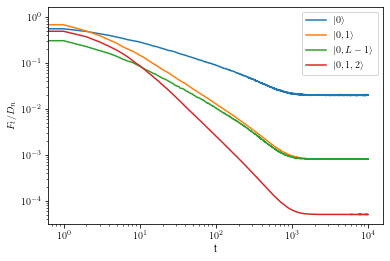

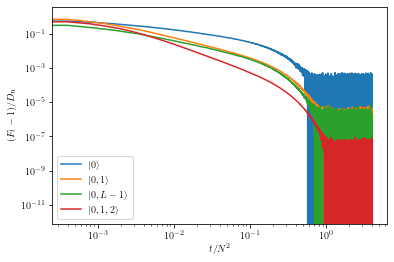

In [32]:
ds = [D1, D2, D2, D3]
purities = [single_purities, left_purities, sep_purities, three_left_purities]
labels = [r'$\vert 0 \rangle$', r'$\vert 0, 1 \rangle$', r'$\vert 0, L-1 \rangle$', r'$\vert 0,1,2 \rangle$']

for d, label, purity in zip(ds, labels, purities):
    pyplot.plot(purity/d, label=label)
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t / D_n$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# for label, purity in zip(labels, purities):
#     pyplot.plot(purity, label=label)
    
# pyplot.xlabel('t')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# pyplot.legend()
# pyplot.show()

for d, label, purity in zip(ds, labels, purities):
    pyplot.plot(numpy.arange(len(purity))/n**2, (purity - 1.0)/d, label=label)
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$(F_t - 1)/D_n$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# Triple defects

$$\rho = \vert 0,1,2 \rangle \langle 0,1,2 \vert$$

In [34]:
ls = 5*numpy.arange(1,11)

triple_scaling_purities = []
triple_scaling_ds = []
for l in tqdm(ls):
    filename = os.path.join(output_dir, f'triple_scaling_{l}.npz')
    if os.path.exists(filename):
        arr = numpy.load(filename)
        D = arr['D']
        purities = arr['data']
    else:
        s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), l, 3, num_experiments=ne)
        D = s.get_enumerated_states().shape[0]
        purities = s.apply_alternative_layers_and_save_mean_purity(t)
        numpy.savez(filename, D=D, data=purities)
    triple_scaling_ds.append(D)
    triple_scaling_purities.append(purities)
triple_scaling_ds = numpy.array(triple_scaling_ds)
triple_scaling_purities = numpy.array(triple_scaling_purities)

  0%|          | 0/10 [00:00<?, ?it/s]

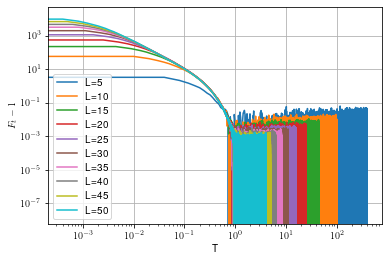

In [35]:
for l,pur in zip(ls,triple_scaling_purities):
    pyplot.plot(numpy.arange(len(pur))/l**2, pur - 1.0, label=f'L={l}')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$F_t - 1$')
pyplot.legend()
pyplot.grid()
pyplot.show()